# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [4]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ocuri\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [5]:
# Read your api key environment variable
#api_key = os.getenv("news_api")
api_key = "42b3801b5bfb47f3b2ba4d1eb416394f"

In [6]:
!pip install newsapi-python

In [7]:
# Create a newsapi client
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=api_key)
print(newsapi)

In [8]:
# Fetch the Bitcoin news articles
bitcoin_headlines = newsapi.get_everything(
    q="bitcoin",
    language="en",
    page_size=100,
    sort_by="relevancy"
)

In [9]:
# Fetch the Ethereum news articles
eth_headlines = newsapi.get_everything(
    q="eth",
    language="en",
    page_size=100,
    sort_by="relevancy"
)

In [10]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    

bit_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
bit_df = bit_df[cols]

bit_df.head()

,date,text,compound,positive,negative,neutral
0,2021-05-12,Just weeks after Tesla started accepting Bitco...,0.3818,0.071,0.00,0.929
1,2021-06-09,El Salvador's President Nayib Bukele has made ...,0.8402,0.282,0.00,0.718
2,2021-05-12,Image: Tesla\r\n\n \n\n Tesla has stopped acce...,0.4939,0.134,0.05,0.816
3,2021-06-09,El Salvador has become the first country in th...,0.1280,0.043,0.00,0.957
4,2021-05-19,Illustration by Alex Castro / The Verge\r\n\n ...,0.0000,0.000,0.00,1.000


In [11]:
# Create the Ethereum sentiment scores DataFrame
eth_sentiments = []

for article in eth_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
eth_df = pd.DataFrame(eth_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
eth_df = eth_df[cols]

eth_df.head()

,date,text,compound,positive,negative,neutral
0,2021-05-12,"Vitalik Buterin, the creator of Ethereum, on W...",0.2263,0.060,0.0,0.940
1,2021-05-19,Illustration by Alex Castro / The Verge\r\n\n ...,0.0000,0.000,0.0,1.000
2,2021-05-29,By Cristina CriddleTechnology reporter\r\nimag...,0.0000,0.000,0.0,1.000
3,2021-05-12,Tesla CEO Elon Musk has changed his stance on ...,0.3818,0.071,0.0,0.929
4,2021-05-11,This story originally appeared on StockNewsThe...,0.4215,0.088,0.0,0.912


In [12]:
# Describe the Bitcoin Sentiment
bit_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.000000
mean,0.047137,0.056150,0.043110,0.900770
std,0.409353,0.068805,0.050601,0.077422
min,-0.762700,0.000000,0.000000,0.677000
25%,-0.273200,0.000000,0.000000,0.846750
50%,0.000000,0.043500,0.020500,0.913500
75%,0.381800,0.078250,0.074500,0.954750
max,0.845500,0.282000,0.203000,1.000000


In [13]:
# Describe the Ethereum Sentiment
eth_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.00000
mean,0.158944,0.068940,0.032100,0.89895
std,0.366229,0.068823,0.048505,0.08286
min,-0.788600,0.000000,0.000000,0.64000
25%,0.000000,0.000000,0.000000,0.84700
50%,0.190100,0.067500,0.000000,0.91550
75%,0.426225,0.106750,0.066250,0.95175
max,0.848100,0.327000,0.203000,1.00000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum

Q: Which coin had the highest compound score?

A: Ethereum

Q. Which coin had the highest positive score?

A: Bitcoin

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [14]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ocuri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ocuri\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ocuri\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [15]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
# YOUR CODE HERE!

In [16]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    regex = re.compile("[^a-zA-Z ]") # Remove the punctuation from text
    re_clean = regex.sub('', text) # Remove the punctuation from text
    words = word_tokenize(re_clean) # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]  # Create a tokenized list of the words
    tokens = [word.lower() for word in lem if word.lower() not in sw]  # Remove the stop words and convert the words to lowercase
    #return ' '.join(tokens)
    return tokens

In [17]:
# Create a new tokens column for Bitcoin
bit_df["token"]=bit_df["text"].apply(tokenizer)
bit_df.head()

,date,text,compound,positive,negative,neutral,token
0,2021-05-12,Just weeks after Tesla started accepting Bitco...,0.3818,0.071,0.00,0.929,"[week, tesla, started, accepting, bitcoin, cur..."
1,2021-06-09,El Salvador's President Nayib Bukele has made ...,0.8402,0.282,0.00,0.718,"[el, salvadors, president, nayib, bukele, ha, ..."
2,2021-05-12,Image: Tesla\r\n\n \n\n Tesla has stopped acce...,0.4939,0.134,0.05,0.816,"[image, tesla, tesla, ha, stopped, accepting, ..."
3,2021-06-09,El Salvador has become the first country in th...,0.1280,0.043,0.00,0.957,"[el, salvador, ha, become, first, country, wor..."
4,2021-05-19,Illustration by Alex Castro / The Verge\r\n\n ...,0.0000,0.000,0.00,1.000,"[illustration, alex, castro, verge, cryptocurr..."


In [18]:
# Create a new tokens column for Ethereum
eth_df["token"]=eth_df["text"].apply(tokenizer)
eth_df.head()

,date,text,compound,positive,negative,neutral,token
0,2021-05-12,"Vitalik Buterin, the creator of Ethereum, on W...",0.2263,0.060,0.0,0.940,"[vitalik, buterin, creator, ethereum, wednesda..."
1,2021-05-19,Illustration by Alex Castro / The Verge\r\n\n ...,0.0000,0.000,0.0,1.000,"[illustration, alex, castro, verge, cryptocurr..."
2,2021-05-29,By Cristina CriddleTechnology reporter\r\nimag...,0.0000,0.000,0.0,1.000,"[cristina, criddletechnology, reporterimage, c..."
3,2021-05-12,Tesla CEO Elon Musk has changed his stance on ...,0.3818,0.071,0.0,0.929,"[tesla, ceo, elon, musk, ha, changed, stance, ..."
4,2021-05-11,This story originally appeared on StockNewsThe...,0.4215,0.088,0.0,0.912,"[story, originally, appeared, stocknewsthe, tr..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [19]:
from collections import Counter
from nltk import ngrams

In [20]:
# Generate the Bitcoin N-grams where N=2
bit_str= bit_df["text"].str.cat()
bit_token = tokenizer(bit_str)
bit_counts = Counter(ngrams(bit_token, n=2))
print(dict(bit_counts))

{('week', 'tesla'): 1, ('tesla', 'started'): 1, ('started', 'accepting'): 1, ('accepting', 'bitcoin'): 6, ('bitcoin', 'currency'): 1, ('currency', 'car'): 1, ('car', 'elon'): 1, ('elon', 'musk'): 23, ('musk', 'revealed'): 1, ('revealed', 'tweet'): 1, ('tweet', 'suspend'): 1, ('suspend', 'effort'): 1, ('effort', 'according'): 1, ('according', 'release'): 1, ('release', 'tesla'): 1, ('tesla', 'doe'): 1, ('doe', 'appear'): 1, ('appear', 'funct'): 1, ('funct', 'charsel'): 1, ('charsel', 'salvadors'): 1, ('salvadors', 'president'): 2, ('president', 'nayib'): 4, ('nayib', 'bukele'): 4, ('bukele', 'ha'): 1, ('ha', 'made'): 1, ('made', 'good'): 1, ('good', 'promise'): 1, ('promise', 'adopt'): 1, ('adopt', 'bitcoin'): 1, ('bitcoin', 'legal'): 3, ('legal', 'tender'): 2, ('tender', 'officials'): 1, ('officials', 'central'): 1, ('central', 'american'): 1, ('american', 'country'): 1, ('country', 'congress'): 1, ('congress', 'voted'): 1, ('voted', 'accept'): 1, ('accept', 'cryptocurrency'): 2, ('cry

In [21]:
# Generate the Ethereum N-grams where N=2
eth_str= eth_df["text"].str.cat()
eth_token = tokenizer(eth_str)
eth_counts = Counter(ngrams(eth_token, n=2))
print(dict(eth_counts))

{('vitalik', 'buterin'): 3, ('buterin', 'creator'): 1, ('creator', 'ethereum'): 1, ('ethereum', 'wednesday'): 1, ('wednesday', 'donated'): 1, ('donated', 'ethereum'): 1, ('ethereum', 'meme'): 1, ('meme', 'coin'): 2, ('coin', 'worth'): 1, ('worth', 'billion'): 1, ('billion', 'one'): 1, ('one', 'largestever'): 1, ('largestever', 'individual'): 1, ('individual', 'philanthropy'): 1, ('philanthropy', 'effortsbuterin'): 1, ('effortsbuterin', 'transferred'): 1, ('transferred', 'eth'): 1, ('eth', 'charsillustration'): 1, ('charsillustration', 'alex'): 1, ('alex', 'castro'): 1, ('castro', 'verge'): 1, ('verge', 'cryptocurrency'): 1, ('cryptocurrency', 'exchange'): 1, ('exchange', 'coinbase'): 2, ('coinbase', 'experiencing'): 1, ('experiencing', 'partial'): 1, ('partial', 'outage'): 2, ('outage', 'morning'): 1, ('morning', 'entire'): 1, ('entire', 'site'): 2, ('site', 'application'): 2, ('application', 'additionally'): 1, ('additionally', 'coinbase'): 1, ('coinbase', 'bin'): 1, ('bin', 'charsby'

In [22]:
# Function token_count generates the top 10 words for a given coin
def token_count(token, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(token).most_common(10)

In [23]:
# Use token_count to get the top 10 words for Bitcoin
token_count(bit_token)

[('bitcoin', 71),
 ('elon', 30),
 ('musk', 29),
 ('tesla', 26),
 ('ha', 25),
 ('cryptocurrency', 23),
 ('currency', 20),
 ('reuters', 18),
 ('week', 15),
 ('may', 15)]

In [24]:
# Use token_count to get the top 10 words for Ethereum
token_count(eth_token)

[('ha', 23),
 ('bitcoin', 21),
 ('eth', 18),
 ('crypto', 15),
 ('ethereum', 14),
 ('one', 10),
 ('cryptocurrency', 9),
 ('wa', 9),
 ('world', 9),
 ('blockchain', 8)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [1]:
!pip install wordcloud

In [25]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

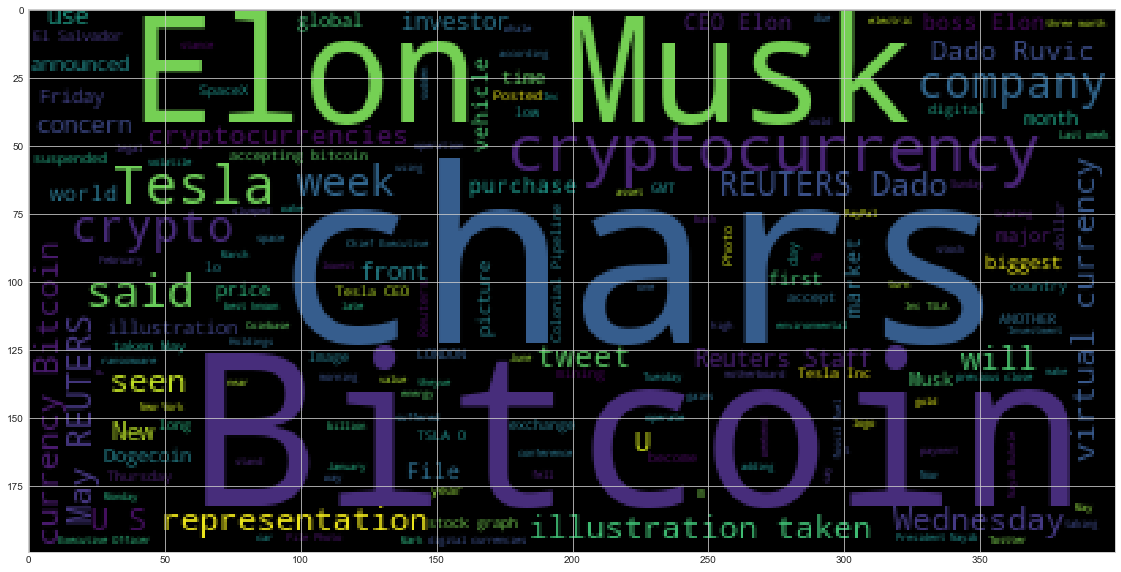

In [29]:
# Generate the Bitcoin word cloud
wc = WordCloud().generate(bit_str)
plt.imshow(wc)

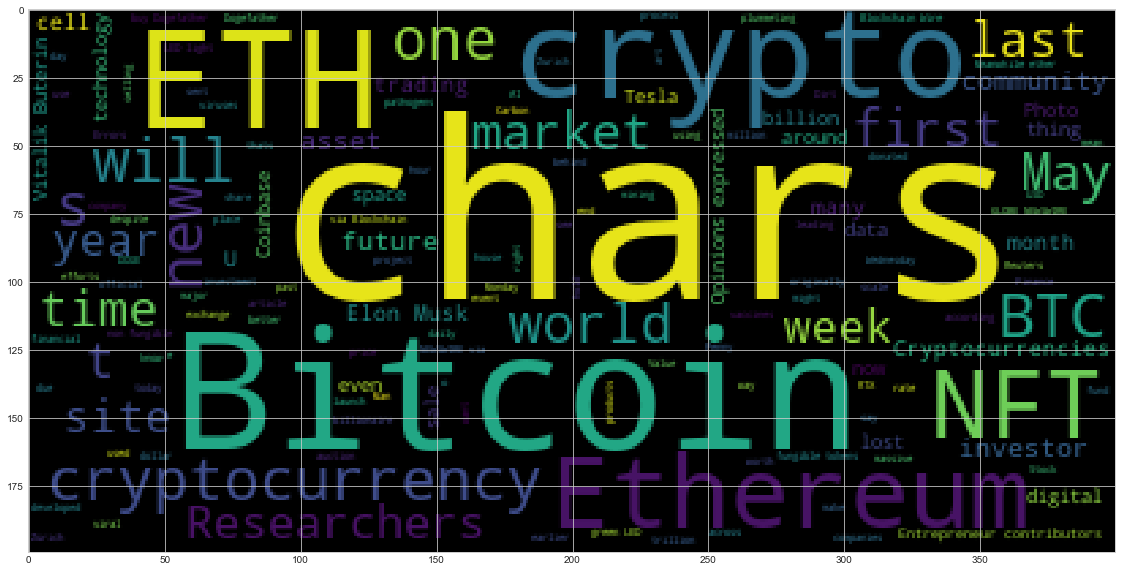

In [31]:
# Generate the Ethereum word cloud
wc = WordCloud().generate(eth_str)
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [33]:
!pip install spacy

  Created wheel for smart-open: filename=smart_open-3.0.0-py3-none-any.whl size=107101 sha256=c788399779b9a516453ba34c54139debd829cea28e7044e0b0622758ca17de0a
  Stored in directory: c:\users\ocuri\appdata\local\pip\cache\wheels\83\a6\12\bf3c1a667bde4251be5b7a3368b2d604c9af2105b5c1cb1870
Successfully built smart-open


In [34]:
import spacy
from spacy import displacy

In [35]:
# Download the language model for SpaCy
!python -m spacy download en_core_web_sm

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


2021-06-11 15:43:53.921219: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2021-06-11 15:43:53.921241: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [36]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [27]:
# Concatenate all of the Bitcoin text together
bit_str

In [39]:
# Run the NER processor on all of the text
doc = nlp(bit_str)

# Render NER visualization with displacy
displacy.render(doc, style='ent')

# Add a title to the document
doc.user_data["title"] = "Bitcoin document"
displacy.render(doc, style='ent')

In [29]:
# Render the visualization
displacy.render(doc, style='ent')

In [40]:
# List all Entities
print([ent.text for ent in doc.ents])

['Just weeks', 'Tesla', 'Bitcoin', 'Elon Musk', 'Salvador', 'Nayib Bukele', 'Central American', 'Tesla', 'Elon Musk', 'Salvador', 'first', 'Nayib Bukele', 'Wednesday', 'Citizens', 'Alex Castro', 'The Verge\r\n\n \n\n Cryptocurrency', 'Coinbase', 'this morning', 'Coinbase', 'Bin', '+1307 chars]Last week', 'Musk', 'Dogecoin', 'Zuckerberg', 'two', 'Max', 'Bitcoin', 'Elon Musk', 'March', 'Musk', 'Tesla', 'Earlier this year', 'EV', '1.5', 'Elon Musk', 'Bitcoin', 'Bitcoin', 'Ethereum', 'Altcoins', 'Tuesday night', 'Wednesday', 'morning', 'months', 'hundreds of billions', 'hours-long', 'this morning', 'May 19th', 'US', 'El Salvador', 'first', 'Bitcoin', 'Miami', 'Florida', 'last weekend', 'covid-19', 'Larry Cermak', 'Last week', 'Disney', 'This week', 'Tec', 'PayPals', 'Wednesday', 'Jose Fernandez da Pontethe', 'more than 5,500 miles', 'the United States', 'Mary-Ann RussonBusiness', 'BBC News', 'US', 'Donald Trump', 'Fox Business', 'Bitcoin', 'US', 'Photo', 'Michele Doying', 'Verge', 'Iran', 

---

### Ethereum NER

In [ ]:
# Concatenate all of the Ethereum text together
eth_str

In [42]:
# Run the NER processor on all of the text
doc = nlp(eth_str)

# Render NER visualization with displacy
displacy.render(doc, style='ent')

# Add a title to the document
doc.user_data["title"] = "Ethereum document"
displacy.render(doc, style='ent')

In [43]:
# Render the visualization
displacy.render(doc, style='ent')

In [44]:
# List all Entities
print([ent.text for ent in doc.ents])

['Vitalik Buterin', 'Ethereum', 'Wednesday', 'Ethereum', '$1.5 billion', 'Buterin', '500', 'ETH', 'Alex Castro', 'The Verge\r\n\n \n\n Cryptocurrency', 'Coinbase', 'this morning', 'Coinbase', 'Bin', 'CriddleTechnology', 'Kim Catdarshian', 'Ethereum', 'Elon Musk', 'March', 'Musk', 'Tesla', 'Earlier this year', 'EV', '1.5', 'StockNewsThe', 'United States', 'Chinas', 'Langloiss days', 'hours', 'Netflix', 'March 2020', 'chars]This week', 'Ethereum (ETH', 'the International Space Station (ISS', 'first', 'ETH', 'Novogratz', 'Lucas Jackson', 'Reuters', 'Billionaire', 'Mike Novogratz', 'between $40,00…', 'Bithumb', 'Seoul', 'South Korea', 'AP Photo/Ahn Young', 'South Korea', '20%', 'Hester Peirce', 'Chris Maddaloni', 'US', '$1.6 trillion', 'Se', 'Spanish', 'AI', 'Last May', 'Buterin', '27', 'daily', 'today', 'Kitco News', 'Kai Morris', 'Vitalik Buterin', 'Entrepreneur', 'a manic Monday', 'half a trillion dollars', 'Bitcoin', 'a bad week', 'Elon Musk', 'Bitcoins', '12k', 'Tesla', 'Bitcoin', 'Ma

---